Two BladeRF2 SDRs are compared.

Each has 50 ohm terminators fitted on their respective RX1 and RX2 channels.

rx config 

 State: Idle
  Channels: RX1, RX2
  Last error: None
  File: bladex.bin
  File format: SC16 Q11, Binary
  #Samples: 10485760
  #Buffers: 32
  #Samples per buffer: 32768
  #Transfers: 16
  Timeout (ms): 1000
  
  The results are plotted below.

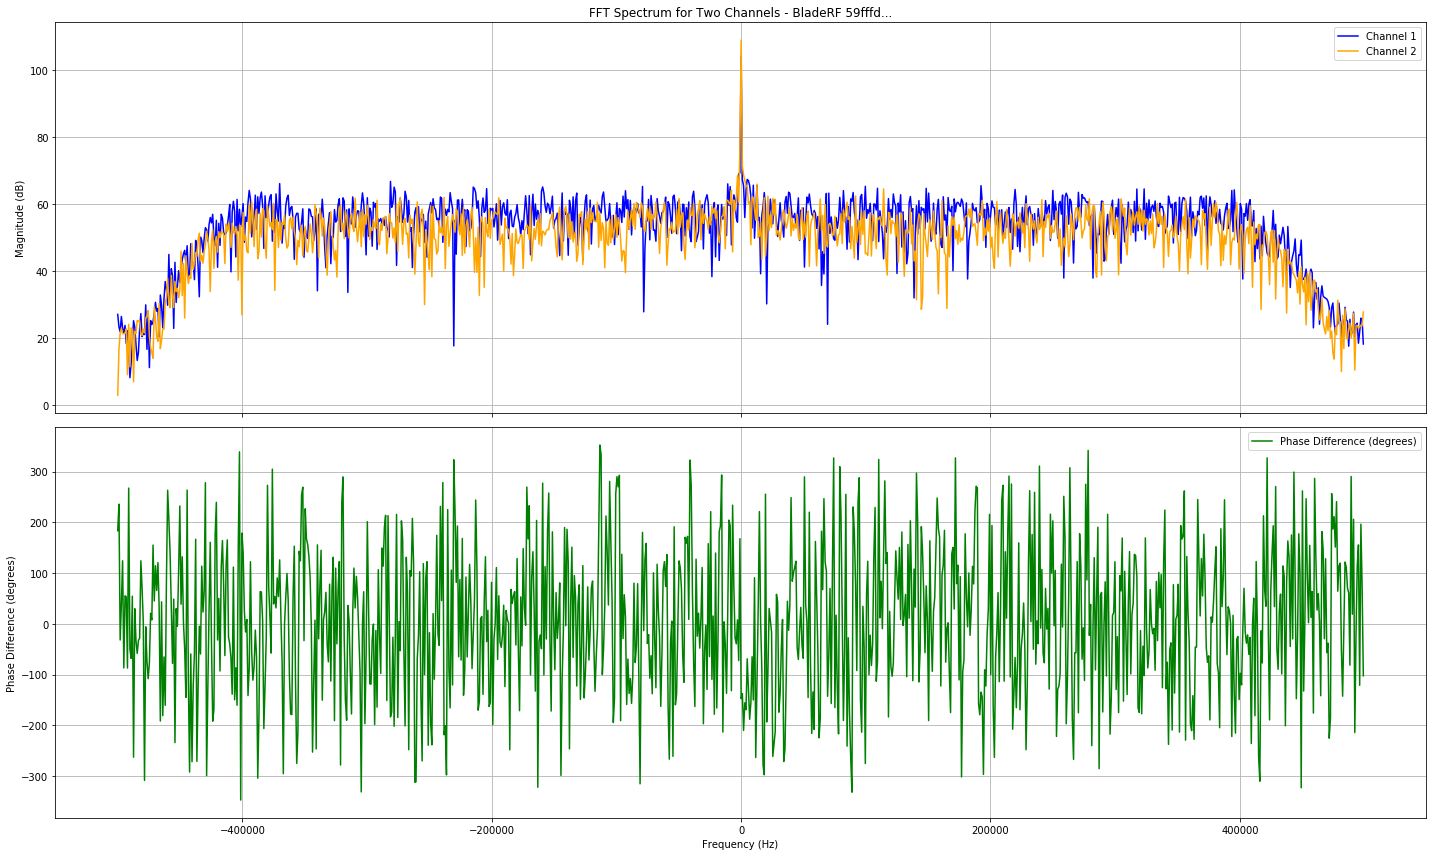

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'blade0.bin'
sample_rate = 1e6  # Sample rate in Hz
num_samples = 10485760  # Number of samples to read
fft_size = 1024     # FFT size (should be a power of 2)

with open(file_path, 'rb') as file:
    data = np.fromfile(file, dtype='<i2', count=num_samples * 2)

channel1_data = data[::4] + 1j * data[1::4]
channel2_data = data[2::4] + 1j * data[3::4]

spectrum_channel1 = np.fft.fftshift(np.fft.fft(channel1_data, fft_size))
spectrum_channel2 = np.fft.fftshift(np.fft.fft(channel2_data, fft_size))

#gain_offset = np.average((np.median(spectrum_channel1)/np.median(spectrum_channel2)))

#spectrum_channel2 *= gain_offset

frequency_axis = np.fft.fftshift(np.fft.fftfreq(fft_size, 1 / sample_rate))

phase_difference_degrees = np.angle(spectrum_channel2) - np.angle(spectrum_channel1)
phase_difference_degrees = np.degrees(phase_difference_degrees)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

ax1.plot(frequency_axis, 20 * np.log10(np.abs(spectrum_channel1)), label='Channel 1', color='blue')
ax1.plot(frequency_axis, 20 * np.log10(np.abs(spectrum_channel2)), label='Channel 2', color='orange')
ax1.set_title('FFT Spectrum for Two Channels - BladeRF 59fffd...')
ax1.set_ylabel('Magnitude (dB)')
ax1.legend()
ax1.grid(True)

ax2.plot(frequency_axis, phase_difference_degrees, label='Phase Difference (degrees)', color='green')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase Difference (degrees)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


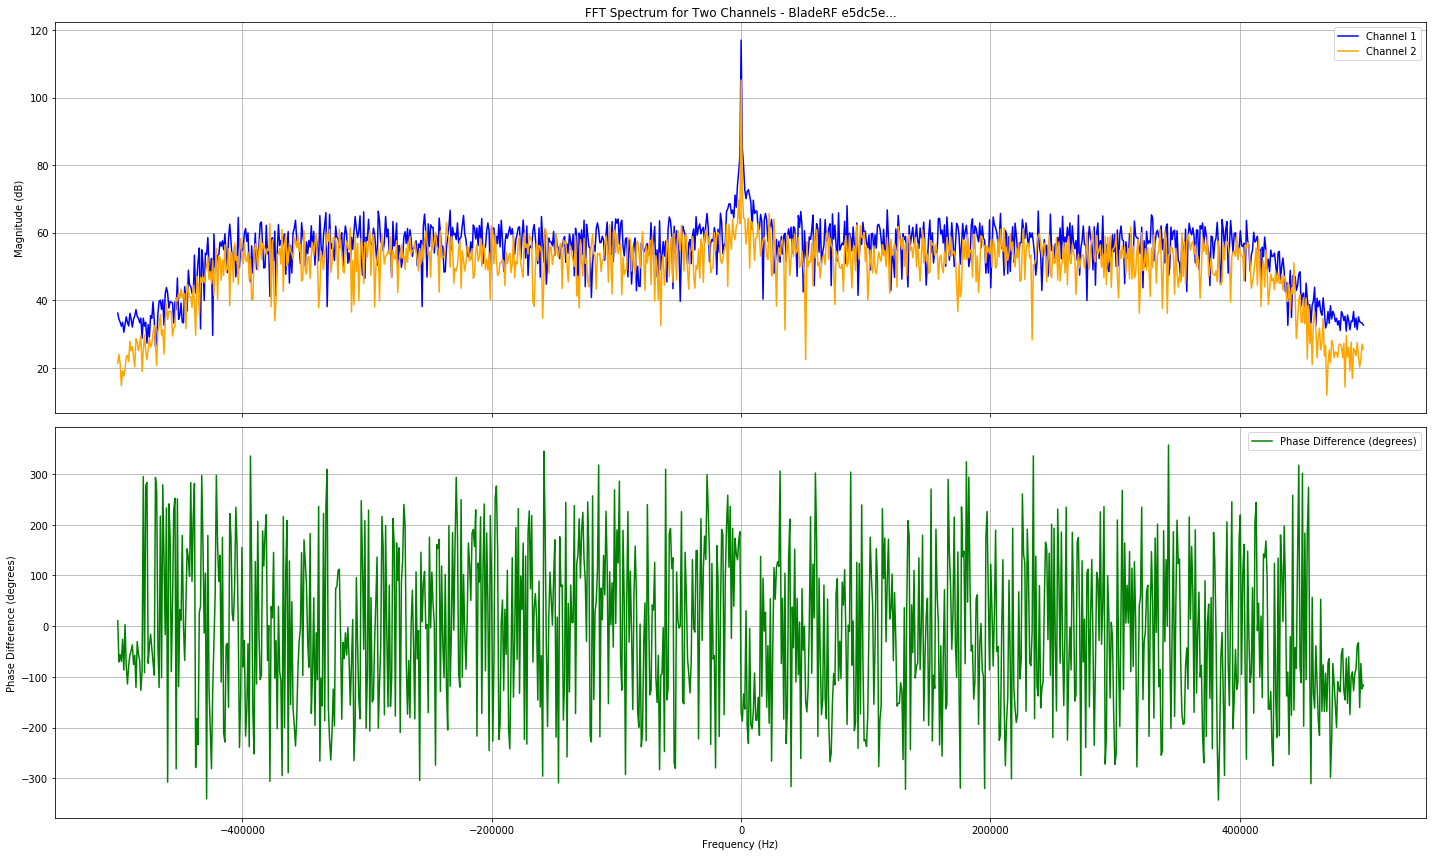

In [2]:
file_path = 'blade1.bin'
sample_rate = 1e6  # Sample rate in Hz
num_samples = 10485760  # Number of samples to read
fft_size = 1024     # FFT size (should be a power of 2)

with open(file_path, 'rb') as file:
    data = np.fromfile(file, dtype='<i2', count=num_samples * 2)

channel1_data = data[::4] + 1j * data[1::4]
channel2_data = data[2::4] + 1j * data[3::4]

spectrum_channel1 = np.fft.fftshift(np.fft.fft(channel1_data, fft_size))
spectrum_channel2 = np.fft.fftshift(np.fft.fft(channel2_data, fft_size))

#gain_offset = np.average((np.median(spectrum_channel1)/np.median(spectrum_channel2)))

#spectrum_channel2 *= gain_offset

frequency_axis = np.fft.fftshift(np.fft.fftfreq(fft_size, 1 / sample_rate))

phase_difference_degrees = np.angle(spectrum_channel2) - np.angle(spectrum_channel1)
phase_difference_degrees = np.degrees(phase_difference_degrees)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

ax1.plot(frequency_axis, 20 * np.log10(np.abs(spectrum_channel1)), label='Channel 1', color='blue')
ax1.plot(frequency_axis, 20 * np.log10(np.abs(spectrum_channel2)), label='Channel 2', color='orange')
ax1.set_title('FFT Spectrum for Two Channels - BladeRF e5dc5e...')
ax1.set_ylabel('Magnitude (dB)')
ax1.legend()
ax1.grid(True)

ax2.plot(frequency_axis, phase_difference_degrees, label='Phase Difference (degrees)', color='green')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase Difference (degrees)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
